# PACKAGES

In [3]:
!jupyter troubleshoot

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
$PATH:
	/anaconda3/envs/lavoro_angelo_mena/bin
	/anaconda3/envs/lavoro_angelo_mena/bin
	/anaconda3/envs/lavoro_angelo_mena/bin
	/anaconda3/bin
	/Library/Frameworks/Python.framework/Versions/3.6/bin
	/usr/local/bin
	/usr/bin
	/bin
	/usr/sbin
	/sbin
	/Library/TeX/texbin
	/opt/X11/bin

sys.path:
	/anaconda3/envs/lavoro_angelo_mena/bin
	/anaconda3/envs/lavoro_angelo_mena/lib/python36.zip
	/anaconda3/envs/lavoro_angelo_mena/lib/python3.6
	/anaconda3/envs/lavoro_angelo_mena/lib/python3.6/lib-dynload
	/anaconda3/envs/lavoro_angelo_mena/lib/python3.6/site-packages

sys.executable:
	/anaconda3/envs/lavoro_angelo_mena/bin/python3.6

sys.version:
	3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:07:29) 
	[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]

platform.platform():
	Darwin-17.7.0-x86_64-i386-64bit

which -a jupyter:
	/anaconda3/envs/la

In [2]:
!/etc/hosts

/bin/sh: /etc/hosts: Permission denied


In [1]:
#from igraph import *
import networkx as nx
import numpy as np

In [3]:
import pandas as pd
#import seaborn as sns
import cairocffi as cairo

ImportError: No module named pandas

# IMPORTING THE CSV

In [ ]:
df_sheet1 = pd.read_excel("dati.xlsx", sheetname=1, skiprows = 2)
#df_sheet1  
df_sheet2 = pd.read_excel("dati.xlsx", sheetname=2, skiprows = 2)
#df_sheet2   
#df_sheet1.iloc[0] 
#mi da tutta la prima riga del dataframe (escluso l'header). A me questo servirà molto in futuro quando creerò il dizionario.


In [ ]:
paesi_mena = list(df_sheet1.columns)[3:] #prendo la prima riga a partire dal terzo elemento in pratica
paesi_mena = np.array(list(df_sheet1.columns)[3:], dtype = str)
#paesi_mena

In [3]:
valori_imp = np.array(df_sheet1[paesi_mena],dtype = int)
valori_exp = np.array(df_sheet2[paesi_mena],dtype = int)

NameError: name 'df_sheet1' is not defined

In [9]:
importing_country_array = np.array(df_sheet1['Importing Country'], dtype = str)
#np.unique(importing_country_array, return_counts=True) #unique mostra quante volte un elemento è ripetuto in un array (22 volte nel nostro caso) e ogni elemento dell'array singolarmente
importing_country_array_unique = np.unique(importing_country_array, return_counts=True)[0]
exporting_country_array = np.array(df_sheet2['Exporting Country'], dtype = str)
exporting_country_array_unique = np.unique(exporting_country_array, return_counts = True)[0]

In [10]:
products_array = np.array(df_sheet1['descriptions'], dtype = str)
#np.unique(products_array, return_counts=True)
products_array_unique = np.unique(products_array, return_counts=True)[0]

In [25]:
#Esempio con AUS. Devo implementarlo per ciascun paese in importing_country_array_unique.

#df_sheet1[df_sheet1["Importing Country"] == "AUS"] #maschera (modo di selezionare); serve per accedere ai valori per ciascuna country 

#df_sheet1[df_sheet1["Importing Country"] == "AUS"]['Cyprus']
#df_sheet1[df_sheet1["Importing Country"] == "AUS"]['France']
#df_sheet1[df_sheet1["Importing Country"] == "AUS"]['Italy']


#type(np.array(df_sheet1[df_sheet1["Importing Country"] == "AUS"]['Italy'], dtype = int))
#np.array(df_sheet1[df_sheet1["Importing Country"] == "AUS"]['Cyprus'], dtype = int)
products_array

array(['Paddy rice', 'Wheat', 'Cereal grains nec', ...,
       'Food products nec', 'Beverages and tobacco products', 'nan'],
      dtype='|S64')

# Creating the dictionary for any country: export

In [11]:
importing_country_array_unique = importing_country_array_unique[0:129]
EXP = []
for i in importing_country_array_unique:
    for j in paesi_mena:
        dicty = {'Country': j, 'goods': products_array_unique, 'land_equivalent':(np.array(df_sheet1[df_sheet1["Importing Country"]== i][j],dtype = int))}
        EXP.append(dicty)

#EXP 

#EXP è una lista di dizionari
#notiamo che l'ordine non è quello del dataset bensì quello dell'array importing_country_array_unique, cosicchè,
#ad esempio EXP[0] NON è l'export dell'australia verso cipro, bensì 'export dell'australia verso ALB ecc...

#ora occorre dividere la mega lista EXP di 15 in 15 e chiamarla con il nome del paese nell'ordine
#presente in importing_country_array_unique.

li = [EXP[x:x+15] for x in range(0,1935,15)]
#li[0]

In [18]:
EXP[0]

{'Country': 'Cyprus',
 'goods': array(['Animal products nec', 'Beverages and tobacco products',
        'Bovine cattle, sheep and goats, horses', 'Bovine meat products',
        'Cereal grains nec', 'Crops nec', 'Dairy products', 'Fishing',
        'Food products nec', 'Meat products nec', 'Minerals nec',
        'Oil seeds', 'Paddy rice', 'Plant-based fibers', 'Processed rice',
        'Raw milk', 'Sugar', 'Sugar cane, sugar beet',
        'Vegetable oils and fats', 'Vegetables, fruit, nuts', 'Wheat',
        'Wool, silk-worm cocoons', 'nan'],
       dtype='|S64'),
 'land_equivalent': array([ 0,  1, 15, 25,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,
         0,  0,  0,  0,  0])}

In [12]:
EXP_T = dict()
for country_code in importing_country_array_unique:
    EXP_T["EXP_"+country_code] = []
#con questo for in pratica ogni volta sovrascrivo tutto e per questo mi restituisce sempre l'ultimo valore in li!!!!
#occorre fare un loop non annidato


for num,key in enumerate(EXP_T.keys()):
    EXP_T[key].append(li[num])
#EXP_T["EXP_AUS"]

In [28]:
EXP_T["EXP_ITA"]

[[{'Country': 'Cyprus',
   'goods': array(['Animal products nec', 'Beverages and tobacco products',
          'Bovine cattle, sheep and goats, horses', 'Bovine meat products',
          'Cereal grains nec', 'Crops nec', 'Dairy products', 'Fishing',
          'Food products nec', 'Meat products nec', 'Minerals nec',
          'Oil seeds', 'Paddy rice', 'Plant-based fibers', 'Processed rice',
          'Raw milk', 'Sugar', 'Sugar cane, sugar beet',
          'Vegetable oils and fats', 'Vegetables, fruit, nuts', 'Wheat',
          'Wool, silk-worm cocoons', 'nan'],
         dtype='|S64'),
   'land_equivalent': array([  0,   1,  12, 563,   0,   0,   0,   1,   0,   0,   0,   0,   4,
            1,   0,   0,   0,   1,   0,   0,   0,   0])},
  {'Country': 'France',
   'goods': array(['Animal products nec', 'Beverages and tobacco products',
          'Bovine cattle, sheep and goats, horses', 'Bovine meat products',
          'Cereal grains nec', 'Crops nec', 'Dairy products', 'Fishing',
      

# Creating the dictionary for import

In [13]:
exporting_country_array_unique = exporting_country_array_unique[0:129]
IMP = []
for i in exporting_country_array_unique:
    for j in paesi_mena:
        dicty = {'Country': j, 'goods': products_array_unique, 'land_equivalent':(np.array(df_sheet2[df_sheet2["Exporting Country"]== i][j],dtype = int))}
        IMP.append(dicty)

#IMP 
lis = [IMP[x:x+15] for x in range(0,1935,15)]
#li[0]

In [14]:
IMP_T = dict()
for country_code in exporting_country_array_unique:
    IMP_T["IMP_"+country_code] = []
#con questo for in pratica ogni volta sovrascrivo tutto e per questo mi restituisce sempre l'ultimo valore in li!!!!
#occorre fare un loop non annidato


for num,key in enumerate(IMP_T.keys()):
    IMP_T[key].append(lis[num])
#IMP_T["IMP_ALB"]

# Creating the weights export

In [15]:
PESI_EXP = []
importing_country_array_unique = importing_country_array_unique[0:129]
for i in importing_country_array_unique:
    for j in paesi_mena:
        somma = [sum((np.array(df_sheet1[df_sheet1["Importing Country"]== i][j],dtype = int)))]
        PESI_EXP.append(somma)

#PESI_EXP

lu = [PESI_EXP[x:x+15] for x in range(0,1935,15)]
#lu[0]

PESI_EXP_TOT = dict()
for country_code in importing_country_array_unique:
    PESI_EXP_TOT["PESI_EXP_"+country_code] = []
#con questo for in pratica ogni volta sovrascrivo tutto e per questo mi restituisce sempre l'ultimo valore in li!!!!
#occorre fare un loop non annidato


for num,key in enumerate(PESI_EXP_TOT.keys()):
    PESI_EXP_TOT[key].append(lu[num])
PESI_EXP_TOT["PESI_EXP_AUS"]

#SONO 15 PESI CIASCUNO RAPPRESENTA LA SOMMA DEI 22 LAND EQUIVALENT PER CIASCUN PRODOTTO ESPORTATO DA
#AUS, ALB ecc... VERSO RISPETTIVAMENTE CIASCUNO DEI 15 PAESI MENA.
#QUINDI AD ESEMPIO IL PRIMO PESO IN PESI_EXP_TOT["PESI_EXP_AUS"] RAPPRESENTA LA SOMMA DEI PRIMI 22 VALORI
#DI FOOTPRINT SCAMBIATO FRA AUS E CIPRO, IL SECONDO LA SOMMA DEI 22 VALORI DEL FOOTPRINT SCAMBIATO FRA AUS E FRANCE ecc... 
#FINO ALL'ULTIMO CHE RAPPRESENTA LA SOMMA DEI 22 FOOTPRINTS FRA AUS E TUNISIA 

[[[50],
  [27272],
  [1529],
  [4856],
  [5],
  [453],
  [65],
  [13045],
  [183],
  [446],
  [187],
  [7477],
  [4285],
  [983],
  [469]]]

# Creating the weights import

In [16]:
PESI_IMP = []
exporting_country_array_unique = exporting_country_array_unique[0:129]
for i in exporting_country_array_unique:
    for j in paesi_mena:
        somme = [sum((np.array(df_sheet2[df_sheet2["Exporting Country"]== i][j],dtype = int)))]
        PESI_IMP.append(somme)

#PESI_IMP

le = [PESI_IMP[x:x+15] for x in range(0,1935,15)]
#le[0]

PESI_IMP_TOT = dict()
for country_code in exporting_country_array_unique:
    PESI_IMP_TOT["PESI_IMP_"+country_code] = []
#con questo for in pratica ogni volta sovrascrivo tutto e per questo mi restituisce sempre l'ultimo valore in li!!!!
#occorre fare un loop non annidato


for num,key in enumerate(PESI_IMP_TOT.keys()):
    PESI_IMP_TOT[key].append(le[num])
    
#PESI_IMP_TOT["PESI_IMP_AUS"]

In [76]:
#RISPETTO AI DATI PURI DEGLI ARROTONGAMENTI SONO STATI FATTI OGNI VOLTA CHE UN ARRAY VIENE TRASFORMATO
#IN INTERO CON np.array(,dtype = int)

[[[4849],
  [289412],
  [36399],
  [351088],
  [2508],
  [27140],
  [3255],
  [168418],
  [4915],
  [7670],
  [178155],
  [85896],
  [90663],
  [41063],
  [9896]]]

## Creating the network

In [121]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
G_w_exp=nx.Graph()

W=[]
for c in exporting_country_array_unique:
    i=0
    for m in paesi_mena:
        country_exp='PESI_EXP_'+c
        w=PESI_EXP_TOT[country_exp][0][i]
        W.append(w)
        if c!=m:
            G_w_exp.add_edge(c, m, weight=w[0])
            #G_w_exp.add_weighted_edges_from()
            #G_w_exp.add_edge(c, m)
        i=i+1

max_W=max(W)
min_W=min(W)


In [154]:
G_w_exp.edges.data('weight')

EdgeDataView([('QAT', 'Turkey', 319), ('QAT', 'Israel', 9), ('QAT', 'Albania', 24), ('QAT', 'Italy', 1524), ('QAT', 'Portugal', 82), ('QAT', 'Morocco', 106), ('QAT', 'Egypt', 336), ('QAT', 'Malta', 0), ('QAT', 'France', 3536), ('QAT', 'Slovenia', 13), ('QAT', 'Croatia', 149), ('QAT', 'Tunisia', 66), ('QAT', 'Greece', 110), ('QAT', 'Cyprus', 2), ('QAT', 'Spain', 1011), ('EGY', 'Turkey', 6226), ('EGY', 'Israel', 761), ('EGY', 'Albania', 672), ('EGY', 'Italy', 14133), ('EGY', 'Portugal', 1467), ('EGY', 'Morocco', 3264), ('EGY', 'Egypt', 10025), ('EGY', 'Malta', 19), ('EGY', 'France', 52116), ('EGY', 'Slovenia', 285), ('EGY', 'Croatia', 1073), ('EGY', 'Tunisia', 1507), ('EGY', 'Greece', 3764), ('EGY', 'Cyprus', 148), ('EGY', 'Spain', 17210), ('BGD', 'Turkey', 53735), ('BGD', 'Israel', 914), ('BGD', 'Albania', 6437), ('BGD', 'Italy', 49190), ('BGD', 'Portugal', 1895), ('BGD', 'Morocco', 4312), ('BGD', 'Egypt', 10550), ('BGD', 'Malta', 16), ('BGD', 'France', 73414), ('BGD', 'Slovenia', 9716)

In [180]:
Wa=np.array(W)


edge_W=nx.get_edge_attributes(G_w_exp,'weight')
#plt.plot(Wa)
#plt.show()

weights=[]
for key in edge_W:
    if edge_W[key] >1:
        edge_W[key] = 0.1*np.log10(edge_W[key])
    else:
        edge_W[key] = 0.001
    weights.append(edge_W[key])
    
    

In [238]:
G_w_exp.node()


NodeView(('QAT', 'EGY', 'BGD', 'NAM', 'BGR', 'BOL', 'GHA', 'PAK', 'PAN', 'MYS', 'TZA', 'BWA', 'KHM', 'XOC', 'PRY', 'HKG', 'Spain', 'SVN', 'CHE', 'XEE', 'HRV', 'CHL', 'CHN', 'LAO', 'XAC', 'FIN', 'URY', 'THA', 'NPL', 'MAR', 'PHL', 'ZAF', 'NIC', 'MLT', 'KAZ', 'Turkey', 'NGA', 'BEL', 'XSU', 'DEU', 'France', 'XSC', 'XSA', 'GBR', 'XSE', 'MWI', 'CRI', 'CMR', 'XNA', 'XSM', 'HUN', 'NLD', 'GEO', 'ROU', 'MNG', 'XER', 'BLR', 'GRC', 'XCB', 'MOZ', 'XCA', 'XCF', 'Portugal', 'ZWE', 'IND', 'LVA', 'VNM', 'NOR', 'CZE', 'HND', 'MUS', 'LUX', 'ISR', 'PER', 'IDN', 'XNF', 'ETH', 'COL', 'Slovenia', 'MDG', 'ECU', 'SEN', 'XTW', 'FRA', 'LTU', 'UGA', 'ZMB', 'TWN', 'GTM', 'DNK', 'UKR', 'Morocco', 'AUS', 'Albania', 'Croatia', 'AUT', 'VEN', 'LKA', 'KEN', 'XEF', 'XEA', 'XEC', 'TUR', 'ALB', 'OMN', 'ITA', 'Tunisia', 'SAU', 'TUN', 'RUS', 'Cyprus', 'MEX', 'BRA', 'CIV', 'Italy', 'USA', 'SWE', 'AZE', 'Malta', 'CAN', 'XWF', 'KOR', 'SVK', 'Israel', 'CYP', 'SGP', 'POL', 'KWT', 'EST', 'ESP', 'SLV', 'ARG', 'IRL', 'PRT', 'IRN', '

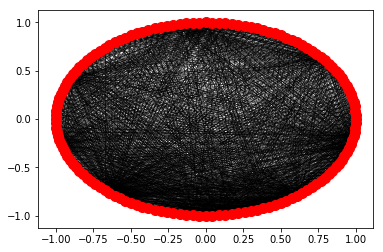

In [245]:
pos = nx.circular_layout(G_w_exp, dim=2)

c=exporting_country_array_unique
nx.draw_networkx_nodes(G_w_exp, pos, node_size=100)

nx.draw_networkx_edges(G_w_exp, pos, width=weights)

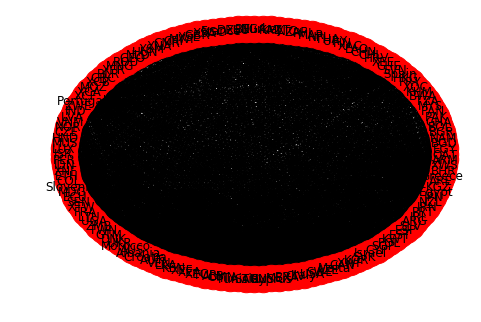

In [246]:
nx.draw(G_w_exp, pos=pos, node_size=700, with_labels=True)

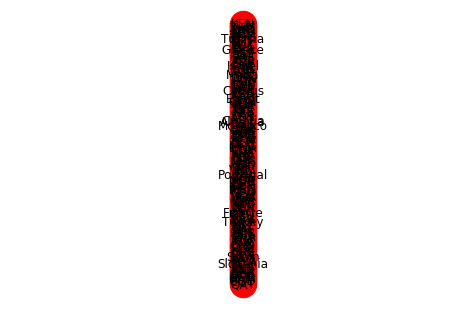

In [251]:
i=0
j=0
for key in pos:
    pos[key]= np.array([i,j])
    j=j+0.1

nx.draw(G_w_exp, pos=pos, node_size=700, with_labels=True)
                       

## Map of the flows

In [256]:
from geopy.geocoders import Nominatim
import folium

geolocator = Nominatim()
country=list(G_w_exp.node())
country_coordinate=[]

for c in country:
    loc= geolocator.geocode(c)
    country_coordinate.append(loc)
    

In [237]:
geolocator.geocode('XOC')

Location((34.1857212, -118.6046725, 0.0))

In [229]:

def show_exp_network():
    #Initialising map, centered on Europe
    geolocator = Nominatim()
    Europe = geolocator.geocode('Europe')
    map_comm = folium.Map(location=[Europe.latitude, Europe.longitude],
                     zoom_start=4)

    country=list(G_w_exp.node())
    
    

    for i in country_coordinate:
        if i != None:
            folium.CircleMarker(location=[i.latitude,i.longitude], 
                             popup='aaa',
                             radius=10.0,
                             fill=True,
                             #clustered_marker = True
                             ).add_to(map_comm)

        #We now draw lines connecting the affine members
        #neigh=sub_g.neighbors(i)
        #neigh is the subgraph of all the nodes connected to node i
        #location=[sub_g.vs(i)["lat"][0], sub_g.vs(i)["lon"][0]]
        #for k in neigh:
        #    location2=[sub_g.vs(k)["lat"][0], sub_g.vs(k)["lon"][0]]
        #    points=(tuple(location),tuple(location2))
        #    folium.PolyLine(points, color="red", weight=0.3,opacity=0.2).add_to(map_comm)
    #map_comm.save('/Users/facchini/Documents/Openmaker/Network_An_API/map_OM_out.html')
    
    ####
    #### Uncomment this if Json output is needed
    ####
    #json_map=map_comm.get_root().to_json()
    #return json_map
    
    #html_map = map_comm.get_root().render()
    #return html_map
    return map_comm



In [257]:
show_exp_network()